## Broadcasting

In [1]:
import numpy as np

In [2]:
M = np.ones((3, 3))
a = np.array([0, 1, 2])

In [3]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [4]:
# More complicated
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [5]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [6]:
a * b

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

### Broadcasting ex 1

In [10]:
M = np.ones((2, 3))
a = np.arange(3)

In [11]:
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [12]:
a

array([0, 1, 2])

In [9]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

### Broadcasting ex 2

In [13]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [14]:
a

array([[0],
       [1],
       [2]])

In [15]:
b

array([0, 1, 2])

In [16]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting ex 3

In [17]:
M = np.ones((3, 2))
a = np.arange(3)

In [18]:
M

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [19]:
a

array([0, 1, 2])

In [20]:
a + M

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [21]:
a[:, np.newaxis].shape

(3, 1)

In [22]:
a.shape

(3,)

In [23]:
M.shape

(3, 2)

In [24]:
M + a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

In [25]:
a[:, np.newaxis]

array([[0],
       [1],
       [2]])

## Broadcasting in Practice

### Centering an Array

In [30]:
X = np.random.randint(10, size=(10, 3))
X  # Array of 10 observations, each of which has 3 values

array([[7, 4, 1],
       [6, 6, 6],
       [8, 2, 6],
       [5, 9, 8],
       [9, 6, 7],
       [4, 4, 7],
       [6, 5, 6],
       [4, 7, 1],
       [5, 5, 6],
       [9, 5, 4]])

In [33]:
Xmean = X.mean(0)
Xmean

array([ 6.3,  5.3,  5.2])

In [34]:
X_centered = X - Xmean
X_centered

array([[ 0.7, -1.3, -4.2],
       [-0.3,  0.7,  0.8],
       [ 1.7, -3.3,  0.8],
       [-1.3,  3.7,  2.8],
       [ 2.7,  0.7,  1.8],
       [-2.3, -1.3,  1.8],
       [-0.3, -0.3,  0.8],
       [-2.3,  1.7, -4.2],
       [-1.3, -0.3,  0.8],
       [ 2.7, -0.3, -1.2]])

In [37]:
X_centered.mean(0)  # Mean is now 0.

array([  1.77635684e-16,   1.77635684e-16,  -1.77635684e-16])

### Plotting a 2D function

In [41]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ..., 
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

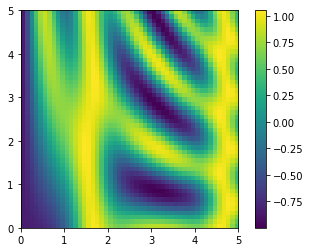

In [40]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Comparisons, Masks, and Boolean Logic

In [2]:
import numpy as np
x = np.array([[1, 1, 1, 1, 1], 
              [2, 2, 2, 2, 2]])

a, b = np.split(x, [1])
print(a)
print(b)
a.squeeze()

[[1 1 1 1 1]]
[[2 2 2 2 2]]


array([1, 1, 1, 1, 1])

### Example: Counting Rainy Days

1/15/2018

In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [12]:
rf = pd.read_csv('Seattle2014.csv')
rf.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [13]:
rainfall = rf['PRCP'].values  # .values to extract values as a np array
inches = rainfall / 254  # 1/10mm > inches
inches.shape

(365,)

(array([ 245.,   14.,   13.,   17.,    8.,    6.,    5.,    6.,    4.,
           3.,    7.,    6.,    3.,    3.,    3.,    4.,    4.,    2.,
           4.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,    0.,
           2.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.]),
 array([ 0.        ,  0.04596457,  0.09192913,  0.1378937 ,  0.18385827,
         0.22982283,  0.2757874 ,  0.32175197,  0.36771654,  0.4136811 ,
         0.45964567,  0.50561024,  0.5515748 ,  0.59753937,  0.64350394,
         0.6894685 ,  0.73543307,  0.78139764,  0.8273622 ,  0.87332677,
         0.91929134,  0.96525591,  1.01122047,  1.05718504,  1.10314961,
         1.14911417,  1.19507874,  1.24104331,  1.28700787,  1.33297244,
         1.37893701,  1.42490157,  1.47086614,  1.51683071,  1.56279528,
         1.60875984,  1.65472441,  1.70068898,  1.74665354,  1.79261811,
         1.83858268]),
 <a list of 40 Patch objects>)

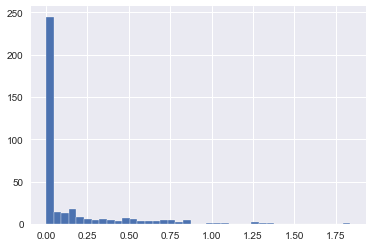

In [17]:
plt.hist(inches, 40, edgecolor='white')  # So most rainfall was 0 inches in 2014

### Comparison Operators as ufuncs

In [18]:
x = np.array([1, 2, 3, 4, 5])

In [19]:
x < 3

array([ True,  True, False, False, False], dtype=bool)

In [20]:
x > 3

array([False, False, False,  True,  True], dtype=bool)

In [21]:
x <= 3

array([ True,  True,  True, False, False], dtype=bool)

In [22]:
x != 3

array([ True,  True, False,  True,  True], dtype=bool)

In [23]:
x == 3

array([False, False,  True, False, False], dtype=bool)

In [24]:
(2*x) == (x**2)

array([False,  True, False, False, False], dtype=bool)

In [25]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [26]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)